En el ejemplo 2.12 se usan los datos de MEAP93.RAW. Ahora se quiere explorar la relación
entre la tasa de aprobados en matemáticas (math10) y el gasto por estudiante (expend).

i) ¿Piensa que cada dólar más que se gasta tiene un mismo efecto en la tasa de aprobados
o parece más apropiado que haya un efecto decreciente? Explique.

In [1]:
# Respuesta 1
respuesta = '''
Si el gasto por estudiante se incrementa, es esperable esperar
que la tasa de estudiantes aprovados se incremente. Sin embargo,
si el gasto por estudiante se eleva al infinito no es posible esperar
que la tasa de estudiantes aprovados se incremente hasta la totalidad.
Es claro que la tasa se ira incrementando hasta que el aporte de cada 
dólar nuevo se vuelva cero. Es decir rendimientos decrecientes.
'''
print(respuesta)


Si el gasto por estudiante se incrementa, es esperable esperar
que la tasa de estudiantes aprovados se incremente. Sin embargo,
si el gasto por estudiante se eleva al infinito no es posible esperar
que la tasa de estudiantes aprovados se incremente hasta la totalidad.
Es claro que la tasa se ira incrementando hasta que el aporte de cada 
dólar nuevo se vuelva cero. Es decir rendimientos decrecientes.



ii) En el modelo poblacional

$$ math10 = \beta_0 + \beta_1 log(expend) + u, $$

justifique que $\beta_1 / 10$ es el cambio en puntos porcentuales en math10 dado un aumento de
10% en expend.

In [2]:
# Respuesta 2
respuesta = '''
Se interpreta ß1 en el modelo como:
        Δy = (ß1 / 100)% Δx
por lo que si Δx = 10:
        Δy = (ß1 / 100)% (10)
        Δy = (ß1 / 10)%
'''
print(respuesta)


Se interpreta ß1 en el modelo como:
        Δy = (ß1 / 100)% Δx
por lo que si Δx = 10:
        Δy = (ß1 / 100)% (10)
        Δy = (ß1 / 10)%



iii) Use los datos de MEAP93.RAW para estimar el modelo del inciso ii). Dé la ecuación
estimada de la manera usual, incluyendo el tamaño de la muestra y R-cuadrada.

In [3]:
# Respuesta 3
# Cargamos las librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Cargamos los datos
data = pd.read_csv(
    'C:/Users/crisd/OneDrive/Escritorio/libros/Datasets/MEAP93.csv',
    usecols=['math10', 'expend'])

# Modificamos los datos
y = data['math10'].copy()
x = np.log(data['expend'].copy())

# Agregamos una columna de unos
x_sm = sm.add_constant(x)

# Creamos el modelo y lo entrenamos
model = sm.OLS(y, x_sm).fit()

# Imprimimos los resultados
print(model.summary(title='Modelo de Regresion Lineal'))


                          Modelo de Regresion Lineal                          
Dep. Variable:                 math10   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     12.41
Date:                Tue, 03 May 2022   Prob (F-statistic):           0.000475
Time:                        00:05:31   Log-Likelihood:                -1531.4
No. Observations:                 408   AIC:                             3067.
Df Residuals:                     406   BIC:                             3075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.3412     26.530     -2.614      0.0

iv) ¿Qué tan grande es el efecto estimado del gasto? Es decir, si el gasto aumenta 10%, ¿cuál
es el aumento de math10 en puntos porcentuales?

In [4]:
b1 = model.params[1]
b0 = model.params[0]

respuesta = f'''
El efecto estimado del gasto por estudiante es: {b1:.2f}%, 
es decir que si el gasto por estudiante se incrementa en 10%,
la tasa se incrementa en {b1 * np.log(1.1):.5f} puntos en promedio.
'''

print(respuesta)


El efecto estimado del gasto por estudiante es: 11.16%, 
es decir que si el gasto por estudiante se incrementa en 10%,
la tasa se incrementa en 1.06408 puntos en promedio.



v) Puede ser preocupante que el análisis de regresión produzca valores ajustados para
math10 que sean mayores a 100. ¿Por qué esto no es de preocupar en esta base estándar
de datos?

In [5]:
y_hat = b0 + b1 * max(x)

respuesta = f'''
Es un problema que el modelo prediga una tasa de mas del 100% de aprobaciones.
Sin embargo, esto no es un problema en este conjunto de datos dado que el aporte
maximo es de {int(np.exp(max(x)))} dólares, con transformación logaritmica es {round(max(x), 3)} 
y produce una predicción de aprobación del {y_hat:.2f}% lo que esta muy lejos del 100%.
'''
print(respuesta)



Es un problema que el modelo prediga una tasa de mas del 100% de aprobaciones.
Sin embargo, esto no es un problema en este conjunto de datos dado que el aporte
maximo es de 7419 dólares, con transformación logaritmica es 8.912 
y produce una predicción de aprobación del 30.15% lo que esta muy lejos del 100%.



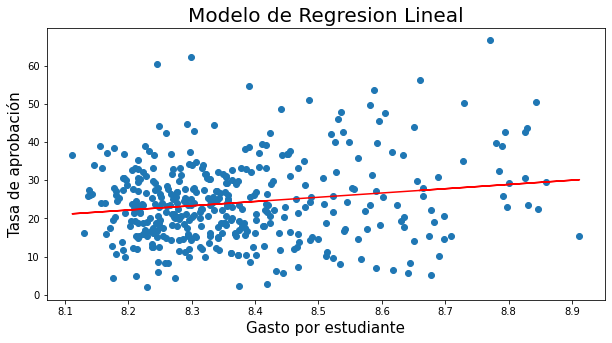

In [6]:
# Por ultimo, graficamos los datos
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, model.predict(x_sm), 'r')
plt.title('Modelo de Regresion Lineal', fontsize=20)
plt.xlabel('Gasto por estudiante', fontsize=15)
plt.ylabel('Tasa de aprobación', fontsize=15)
plt.show()